# Feature Reduction with PCA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


In [5]:
data_path = 'data/processed/combined_labeled_standardized.csv'
df = pd.read_csv(data_path)

## Covariance Matrix

## Standardizing the Data

In [6]:
print(df.count)
df =df.dropna(axis='columns')
print(df.count)

<bound method DataFrame.count of                                             patient_id  healthy  \
0                             GTEX-111FC-3326-SM-5GZYV        1   
1                             GTEX-1128S-2826-SM-5N9DI        1   
2                             GTEX-117XS-3126-SM-5GIDP        1   
3                             GTEX-1192X-3226-SM-5987D        1   
4                             GTEX-11DXW-1026-SM-5H11K        1   
..                                                 ...      ...   
495  TCGA-GBM.f2ed0046-56d9-4a89-91d8-de86bf55d007....        0   
496  TCGA-GBM.f2ed0046-56d9-4a89-91d8-de86bf55d007....        0   
497  TCGA-GBM.fe4f878a-6e1b-4d1b-b2a1-957e9da501ac....        0   
498  TCGA-GBM.fe4f878a-6e1b-4d1b-b2a1-957e9da501ac....        0   
499  TCGA-GBM.fe4f878a-6e1b-4d1b-b2a1-957e9da501ac....        0   

     ENSG00000000003.15  ENSG00000000005.6  ENSG00000000457.14  \
0              0.135330          -0.644255           -0.165947   
1             -0.845590       

In [7]:
# data centered around the origin: healthy
X = df.drop(['healthy', 'patient_id', 'ENSG00000241423.2'], axis=1)
Y = df['healthy']

X.head()

,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001460.18,ENSG00000001461.17,ENSG00000001561.7,ENSG00000001617.12,...,ENSG00000288235.1,ENSG00000288460.1,ENSG00000288558.2,ENSG00000288569.1,ENSG00000288582.2,ENSG00000288596.2,ENSG00000288601.1,ENSG00000288603.1,ENSG00000288611.1,ENSG00000288638.1
0,-0.165947,0.573518,0.286618,0.665016,0.910183,0.018292,-0.065923,-0.364786,-0.432386,-0.643509,...,1.442118,-0.167564,-0.318247,1.347539,-0.086992,0.220568,0.0,-0.288632,-0.871707,-0.36232
1,-1.272226,-0.115995,0.045738,-0.175576,-0.661327,-0.613966,-0.616802,-0.445653,-0.385480,-0.296890,...,-0.644085,-0.167564,-0.044186,1.395051,-0.086992,-1.072841,0.0,-0.288632,-0.871707,-0.36232
2,0.284490,-0.215636,-0.549595,-0.106686,0.786310,0.453277,0.391854,0.419596,0.846210,-0.611179,...,-0.080408,1.686318,1.189672,0.556001,-0.086992,0.438793,0.0,-0.288632,0.396771,-0.36232
3,0.479352,1.753002,1.728641,0.078842,-0.830247,0.536120,0.741008,1.186123,-0.065142,0.954361,...,-0.309608,-0.167564,1.187342,-0.675032,-0.086992,-0.808302,0.0,-0.288632,-0.425684,-0.36232
4,-0.131297,0.338815,-0.756995,-0.471912,0.822626,-0.177194,0.031629,-0.601356,-0.637808,-0.556544,...,0.378734,-0.167564,-0.069146,-0.675032,-0.086992,0.404978,0.0,9.602309,1.879187,-0.36232


In [8]:
pca = PCA(n_components=9).fit(X)
explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained >= 0.95) + 1

print(f"Number of components for >=95% variance: {n_components}")


Number of components for >=95% variance: 1


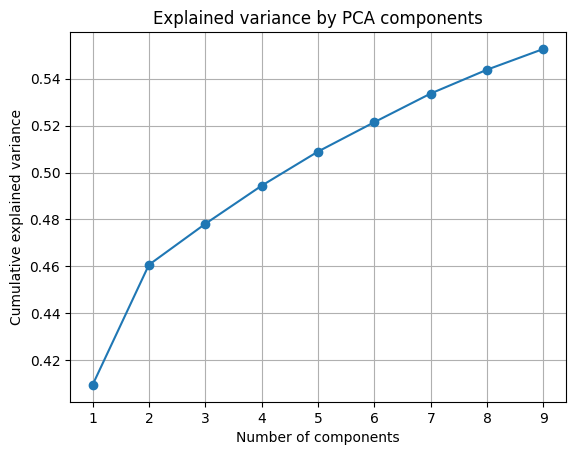

In [9]:
# Visualize explained variance
plt.figure()
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by PCA components')
plt.grid()
plt.show()

In [10]:
clf = RandomForestClassifier(random_state=42)
scores_no_pca = cross_val_score(clf, X, Y, cv=5)
print(f"Accuracy without PCA: {scores_no_pca.mean():.3f}")

pcaN = PCA(n_components=n_components)
X_pcaN = pcaN.fit_transform(X)
scores_pca = cross_val_score(clf, X_pcaN,Y, cv=5)
print(f"Accuracy with PCA ({n_components} components): {scores_pca.mean():.3f}")

Accuracy without PCA: 1.000
Accuracy with PCA (1 components): 0.834


In [16]:
# Create a new cell that compares model performance with PCA reduced features
# Split the data for PCA-transformed features
# Apply PCA transformation

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
# Fit the pipeline
pipeline.fit(X, Y)
# Evaluate the model
print("Model performance with PCA reduced features:")
results = {}
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print(f"Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return model, accuracy, cv_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Evaluate the model without PCA
results['Random Forest'] = {}
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_acc, rf_cv = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
results['Random Forest']['accuracy'] = rf_acc
results['Random Forest']['cv_score'] = rf_cv
# Apply PCA to the training and testing data



# # Store PCA results
# pca_results = {}

# # 1. Logistic Regression with PCA
# print("="*50)
# print("Logistic Regression with PCA")
# print("="*50)
# lr_model_pca = LogisticRegression(max_iter=1000, random_state=42)
# lr_model_pca, lr_acc_pca, lr_cv_pca = evaluate_model(lr_model_pca, X_train_pca, X_test_pca, y_train, y_test)
# pca_results['Logistic Regression'] = {'accuracy': lr_acc_pca, 'cv_score': lr_cv_pca}

# # 2. Decision Tree with PCA
# print("="*50)
# print("Decision Tree with PCA")
# print("="*50)
# dt_model_pca = DecisionTreeClassifier(random_state=42)
# dt_model_pca, dt_acc_pca, dt_cv_pca = evaluate_model(dt_model_pca, X_train_pca, X_test_pca, y_train, y_test)
# pca_results['Decision Tree'] = {'accuracy': dt_acc_pca, 'cv_score': dt_cv_pca}

# # 3. Random Forest with PCA
# print("="*50)
# print("Random Forest with PCA")
# print("="*50)
# rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model_pca, rf_acc_pca, rf_cv_pca = evaluate_model(rf_model_pca, X_train_pca, X_test_pca, y_train, y_test)
# pca_results['Random Forest'] = {'accuracy': rf_acc_pca, 'cv_score': rf_cv_pca}

# # Compare original vs PCA results
# comparison = pd.DataFrame({
#     'Original Accuracy': [results[model]['accuracy'] for model in pca_results],
#     'PCA Accuracy': [pca_results[model]['accuracy'] for model in pca_results],
#     'Original CV Score': [results[model]['cv_score'] for model in pca_results],
#     'PCA CV Score': [pca_results[model]['cv_score'] for model in pca_results]
# }, index=pca_results.keys())

# plt.figure(figsize=(14, 8))
# comparison[['Original Accuracy', 'PCA Accuracy']].plot(kind='bar', figsize=(14, 8))
# plt.title('Model Accuracy Comparison: Original vs PCA')
# plt.ylabel('Accuracy Score')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.legend(['Original Features', f'PCA ({n_components} components)'])
# plt.tight_layout()
# plt.show()

# print("\nModel Performance Comparison (Original vs PCA):")
# print(comparison)

Model performance with PCA reduced features:
Accuracy: 1.000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        47

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
[[53  0]
 [ 0 47]]


In [ ]:
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# print("Training set shape:", X_train.shape)
# print("Testing set shape:", X_test.shape)
# print("Feature columns:", X.columns.tolist())

In [ ]:
# Create a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Create cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return model, accuracy, cv_scores.mean()

# Create a dictionary to store results
results = {}

# 1. Logistic Regression
print("="*50)
print("Logistic Regression")
print("="*50)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
lr_model, lr_acc, lr_cv = evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test)
results['Logistic Regression'] = {'accuracy': lr_acc, 'cv_score': lr_cv}

# 2. Decision Tree
print("="*50)
print("Decision Tree")
print("="*50)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model, dt_acc, dt_cv = evaluate_model(dt_model, X_train, X_test, y_train, y_test)
results['Decision Tree'] = {'accuracy': dt_acc, 'cv_score': dt_cv}

# 3. Random Forest
print("="*50)
print("Random Forest")
print("="*50)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_acc, rf_cv = evaluate_model(rf_model, X_train, X_test, y_train, y_test)
results['Random Forest'] = {'accuracy': rf_acc, 'cv_score': rf_cv}

# # 4. Support Vector Machine (SVM)
# print("="*50)
# print("Support Vector Machine")
# print("="*50)
# svm_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', SVC(kernel='rbf', random_state=42))
# ])
# svm_model, svm_acc, svm_cv = evaluate_model(svm_pipeline, X_train, X_test, y_train, y_test)
# results['SVM'] = {'accuracy': svm_acc, 'cv_score': svm_cv}


# # 5. K-Nearest Neighbors
# print("="*50)
# print("K-Nearest Neighbors")
# print("="*50)
# knn_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', KNeighborsClassifier(n_neighbors=5))
# ])
# knn_model, knn_acc, knn_cv = evaluate_model(knn_pipeline, X_train, X_test, y_train, y_test)
# results['KNN'] = {'accuracy': knn_acc, 'cv_score': knn_cv}

# # 6. Gradient Boosting
# print("="*50)
# print("Gradient Boosting")
# print("="*50)
# gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
# gb_model, gb_acc, gb_cv = evaluate_model(gb_model, X_train, X_test, y_train, y_test)
# results['Gradient Boosting'] = {'accuracy': gb_acc, 'cv_score': gb_cv}

# # 7. Neural Network (MLP Classifier)
# print("="*50)
# print("Neural Network (MLP)")
# print("="*50)
# mlp_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
# ])
# mlp_model, mlp_acc, mlp_cv = evaluate_model(mlp_pipeline, X_train, X_test, y_train, y_test)
# results['Neural Network'] = {'accuracy': mlp_acc, 'cv_score': mlp_cv}


In [ ]:
# Compare model results
results_df = pd.DataFrame(results).T
results_df.columns = ['Test Accuracy', 'CV Score']
results_df = results_df.sort_values('Test Accuracy', ascending=False)
plt.figure(figsize=(14, 7))
results_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nUpdated Model Performance Summary:")
print(results_df)

# Add feature importance for Gradient Boosting (if it's among the top performers)
if hasattr(gb_model, 'feature_importances_'):
    gb_feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': gb_model.feature_importances_
    })
    gb_feature_importance = gb_feature_importance.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(15))
    plt.title('Top 15 Feature Importances (Gradient Boosting)')
    plt.tight_layout()
    plt.show()

gb_feature_importance.head(15)

Accuracy: 0.9800
Cross-validation score: 0.9900 ± 0.0094


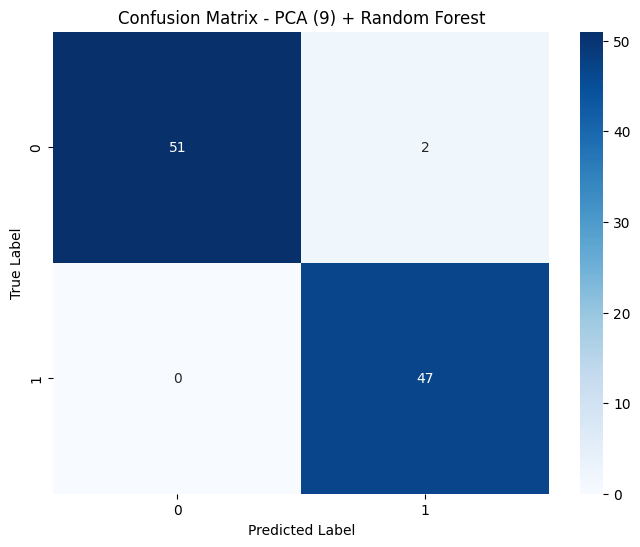


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.96      1.00      0.98        47

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [ ]:
# Create a pipeline with PCA and Random Forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First standardize the data
    ('pca', PCA(n_components=1)),  # Use 9 PCA components
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Cross-validation score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - PCA (9) + Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))